In [2]:
# compatability issues (python 2 & python 3)
from __future__ import print_function
from __future__ import division

In [3]:
# needed libs
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
# torch stuff
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [5]:
# the associated webpage
import IPython
url = 'http://crcv.ucf.edu/data/UCF101.php'
iframe = '<iframe src=' + url + ' width="100%" height=500></iframe>'
IPython.display.HTML(iframe)

In [6]:
path_project = os.getcwd()
path_data = '~/UCF101/'
path_data_video = os.path.join(path_data, 'videos')
path_data_images = os.path.join(path_data, 'images')

In [7]:
classes = sorted(os.listdir(path_data_video))

In [8]:
n_classes = len(classes)

In [9]:
print("There are " + str(len(classes)) + " classes:")
print()
print(classes)

There are 101 classes:

['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth', 'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen', 'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingCello', 'PlayingDaf', 'PlayingDhol', 'PlayingFlute', 'PlayingGuitar', 'PlayingPiano', 'PlayingSi

In [10]:
num_classes = [(x, len(os.listdir(os.path.join(path_data_video, x)))) for x in classes]

In [11]:
num_classes.sort(key=lambda x:-x[1])

In [12]:
print(num_classes)

[('CricketShot', 167), ('TennisSwing', 166), ('HorseRiding', 164), ('PlayingCello', 164), ('PlayingDhol', 164), ('BoxingPunchingBag', 163), ('Drumming', 161), ('ShavingBeard', 161), ('BenchPress', 160), ('PlayingGuitar', 160), ('Punch', 160), ('IceDancing', 158), ('PlayingSitar', 157), ('BandMarching', 155), ('Bowling', 155), ('PlayingFlute', 155), ('WritingOnBoard', 152), ('PlayingDaf', 151), ('BaseballPitch', 150), ('Billiards', 150), ('Diving', 150), ('HammerThrow', 150), ('PoleVault', 149), ('HeadMassage', 147), ('SoccerJuggling', 147), ('ApplyEyeMakeup', 145), ('Archery', 145), ('JumpRope', 144), ('RockClimbingIndoor', 144), ('Shotput', 144), ('Kayaking', 141), ('Hammering', 140), ('TableTennisShot', 140), ('CricketBowling', 139), ('GolfSwing', 139), ('CliffDiving', 138), ('FrontCrawl', 137), ('Rowing', 137), ('SoccerPenalty', 137), ('Mixing', 136), ('Typing', 136), ('Skiing', 135), ('Basketball', 134), ('Biking', 134), ('BoxingSpeedBag', 134), ('SalsaSpin', 133), ('BabyCrawling',

#### Create folder with images

In [13]:
# create folder for images
if not os.path.exists(path_data_images):
    os.mkdir(path_data_images)

In [14]:
# create folders and split to images
for x in classes[:3]:
    path_class_folder_im = os.path.join(path_data_images, x)
    path_class_folder_v = os.path.join(path_data_video, x)
    if not os.path.exists(path_class_folder_im):
        os.mkdir(path_class_folder_im)
    list_video = sorted(os.listdir(path_class_folder_v))
    for v in list_video:
        path_class_folder_v_video = os.path.join(path_class_folder_v, v)
        path_class_folder_im_video = os.path.join(path_class_folder_im, v)[:-4] # withou 'avi' ending
        if not os.path.exists(path_class_folder_im_video):
            os.mkdir(path_class_folder_im_video)
        os.system("ffmpeg -i " + path_class_folder_v_video + 
                  " -f image2 " + path_class_folder_im_video + 
                  "/im_%03d.jpg")

In [21]:
num_frames = [len(os.listdir(os.path.join(path_data_images, x, v)))
              for x in classes[:3]
              for v in sorted(os.listdir(os.path.join(path_data_images, x)))
              ]

mean: 168
max: 558
min: 52

total sum: 68141


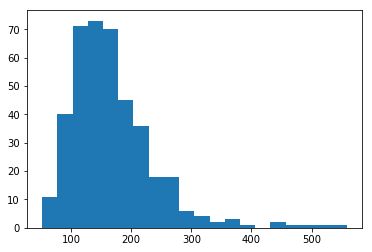

In [33]:
plt.hist(num_frames, bins=20);
print("mean: %d\nmax: %d\nmin: %d\n\ntotal sum: %d" % (np.mean(num_frames), 
                                          np.max(num_frames), 
                                          np.min(num_frames), 
                                          np.sum(num_frames)))